# Facial Emotion Recognition
## <em>A regression problem</em>
In this notebook we will train a neural network on an existing dataset <strong>(FER 2013)</strong> with our own updated weights.

We will be using <strong>Tensorflow</strong> for training and testing our neural network, <strong>OpenCV</strong> to translate the photos into arrays, <strong>Numpy</strong> to analyze these arrays and <strong>matplotlib's PyPlot</strong> to display the collected data.

We start by importing these modules

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

Setting a Directory for our training database

In [2]:
DataDirectory = "train/"

In [3]:
classes = ["0","1","2","3","4","5","6"]

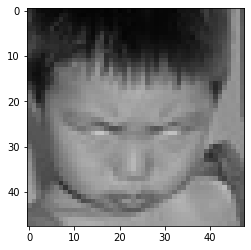

In [4]:
for category in classes:
    path = os.path.join(DataDirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

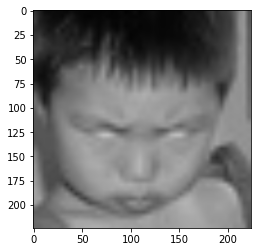

In [5]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

<em>Reading all the images and converting them to array</em>

In [6]:
training_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(DataDirectory, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [7]:
create_training_data()

In [8]:
print(len(training_data))

28709


<em>Shuffling the data</em>

In [9]:
import random

random.shuffle(training_data)


In [10]:
X = []
y = []

for features, label in training_data[:15000]:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [11]:
X.shape

(15000, 224, 224, 3)

<em>Normalizing</em> the data

In [12]:
X= X/255.0;

In [ ]:
Y = np.array(Y)

In [ ]:
Y.shape

(4000,)

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.MobileNetV2()

## Transfer Learning

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

## Adding three dense layers to the existing <em>MobileNetV2</em>

In [ ]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_ouput)

In [ ]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [ ]:
my_model = keras.Model(inputs= base_input, outputs= final_output)

In [ ]:
my_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
my_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
my_model.fit(X,Y, epochs=25)

MemoryError: Unable to allocate 2.24 GiB for an array with shape (4000, 224, 224, 3) and data type float32

In [ ]:
my_model.save('my_first_model.h5')

In [ ]:
new_model = tf.keras.